We know astronomical phenomena are usually far away from us and somewhat dim, thus taking a picture of them requires long exposures, which leads to grainy photos. To overcome this problem and increase the quality of the photographs, photographers often use a procedure called **stacking**. The procedure is: taking multiple exposures with the same settings, stacking them into layers, and creating an image based on the median of all the stacked exposures. Let's explore this method using Python.

<img src="data/contrast.png">

First, let's import matplotlib to help us read in the photos and do visualization work afterward.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

I've created a set of 10 noisy images (named 0.png, 1.png, ..., 9.png) by replacing certain random pixels with a random color. Those images could serve as examples of grainy astrophotography. Let's read in them using the plt.imread() method and stack those pictures into a list called pics.

In [ ]:
pics=[]

# read in the photos and append them to the pics list
for i in range(10):
    pics.append(plt.imread(f'data/{i}.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'data/0.png'

In [ ]:
pics[0].shape

(729, 1041, 4)

Now let's visualize those 10 pictures using the plt.imshow() method to get an idea of what those images would look like.

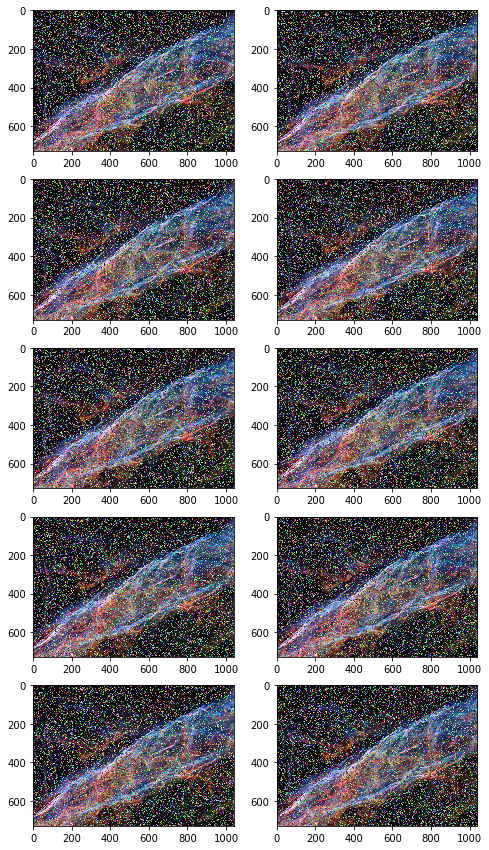

In [ ]:
# create a 5 x 2 subplots to show all the 10 photos
fig,ax=plt.subplots(5,2,figsize=(8,15))
for i in range(5):
    for j in range(2):
        ax[i][j].imshow(pics[i*2+j])

### Pure Python Solution

Let's try a pure Python solution first. We need to first prepare a function to take in a list of values and then return the median.

In [ ]:
# write a function to take in a list of numbers and return the median value
def median(l):
  sum=0
  for i in l:
    sum+=i
  return sum/len(l)

images = [plt.imread(f"{i}.png") for i in range(10)]

Now, let's create a 3d list to store the calculated medians of each pixel. This 3d list should have the same row x columns x channels as the original photo. Please generate such a list and set all values to 0 so that we can assign calculated values later.

In [ ]:
row,col,ch=images[0].shape

# create a 3d list which has the same rows, columns, and channels of the original photo and initialize all values as 0
median_list = [[[0 for _ in range(ch)] for _ in range(col)] for _ in range(row)]


Now we can go over each channel of each pixels of all the 10 photos to calculate the medians and assign those values to their corresponding spots of the 3d list. Please visualize the 3d list using the plt.imshow() method and see if you get a better picture from the stack of the 10 grainy ones. Since we have to use nested loops to go over all pixels to perform the calculation, it might cost a couple seconds to minutes to do so, just be patient.

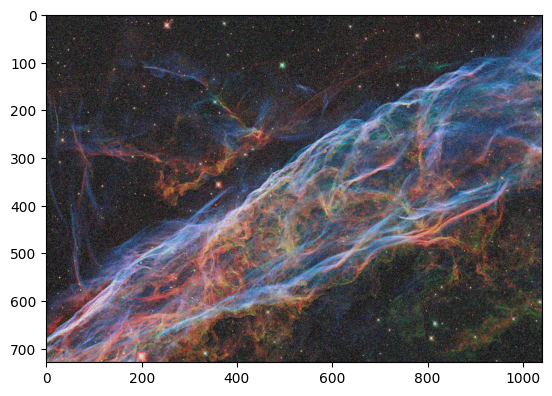

In [ ]:
for i in range(row):
  for j in range(col):
    for k in range(ch):
      median_list[i][j][k]=median([images[l][i][j][k] for l in range(10)])

plt.imshow(median_list)

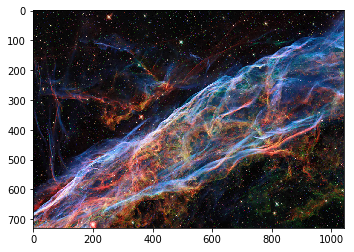

### The Numpy Solution

As you can see, the above method utilized nested lists to store image information and used nested loops to perform the calculation accordingly, which is hightly inefficient. The original images have 729 x 1041 = 758889 pixels to process, and given each pixel has 4 channels (r, g, b, and alpha), our program calculated 758889 x 4 = 3035556 medians in total! Let's see how to use numpy to make things much easier.

First, let's convert the pics list into a numpy array. Given that each normal picture could be represented by a 3d matrix (rows x columns x channels), we are basically creating a 4d data structure (photos x rows x columns x channels).

In [ ]:
# import the numpy module
import numpy as np
# import the numpy module
import numpy as np
import matplotlib.pyplot as plt
# convert the pics list to a 4d array
images = np.array([plt.imread(f"{i}.png") for i in range(1,10)])
# show the shape of the newly created array to check
images.shape

(9, 557, 495, 3)

We need to calculate the medians of all corresponding pixels of all the stacked photos. Please use the np.median() method and set the correct axis to do so. Then please use the plt.imshow() method to visualize the result. Yes, it's that simple and efficient after you've done coding correctly and run the cell.

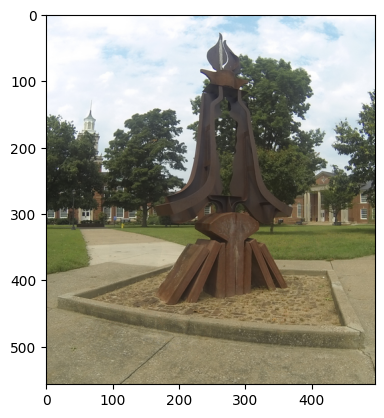

In [ ]:
# calculate the medians of all corresponding pixels of all the stacked photos, the result should be a 3d matrix with the same dimension of the original photos
median_array = np.median(images,axis=0)
# visulize the result
plt.imshow(median_array)

You can save this photo using the plt.imsave() method and compare it with the noised version.

In [ ]:
#plt.imsave(f'data/denoised.png',img)

References

Image Stacker: http://nifty.stanford.edu/2014/nicholson-image-stacker/

How to Reduce Digital Noise in Astrophotography Using Exposure Stacking: https://digital-photography-school.com/reduce-digital-noise-astrophotography-exposure-stacking/